In [43]:
import pandas as pd
import geopandas as gpd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns


Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


In [ ]:
# Loading prediciton DF

hours = {36, 72, 108, 144, 180}
predictionDFs = {}
# Loop through the hours and load the datasets
predictionDS = xr.open_dataset(f"temp_prediction_data/20250424180000-0h-oper-fc.grib2", engine='cfgrib', filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level': 2})
predictionDF = predictionDS.to_dataframe().reset_index()
predictionDFs[0] = predictionDF

for hour in hours:
    predictionDS = xr.open_dataset(f"temp_prediction_data/20250425000000-{hour}h-oper-fc.grib2", engine='cfgrib', filter_by_keys={'typeOfLevel': 'heightAboveGround', 'level': 2})
    predictionDF = predictionDS.to_dataframe().reset_index()
    predictionDFs[hour] = predictionDF


/Users/vibhasri_kandukuri/VSCode/ils_103_project/.venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/Users/vibhasri_kandukuri/VSCode/ils_103_project/.venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(
/Users/vibhasri_kandukuri/VSCode/ils_103_project/.venv/lib/python3.12/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set deco

In [50]:
# Loading past climate data
parsed_data = []

with open("past_climate_data/dly-tavg-normal.txt", "r") as f:
    for line in f:
        parts = line.strip().split()
        
        if len(parts) < 3:
            continue  # skip malformed lines
        
        station_id = parts[0]
        month = int(parts[1])
        temp_values = parts[2:]  # this will be a list of daily strings like '824C', '-8888', etc.
        
        for day, val in enumerate(temp_values, start=1):
            if val in ['-8888', '', None]:
                temp_f = None
            else:
                try:
                    temp_f = int(val[:-1]) / 10  # Remove trailing 'C', convert tenths of °F
                except ValueError:
                    temp_f = None
            
            parsed_data.append({
                "station_id": station_id,
                "year": 2010,  # normal year placeholder
                "month": month,
                "day": day,
                "avg_temp_f": temp_f
            })

# Build the DataFrame
pastTempDF = pd.DataFrame(parsed_data)

pastTempDF.head()

,station_id,year,month,day,avg_temp_f
0,AQW00061705,2010,1,1,82.4
1,AQW00061705,2010,1,2,82.4
2,AQW00061705,2010,1,3,82.4
3,AQW00061705,2010,1,4,82.4
4,AQW00061705,2010,1,5,82.4


In [ ]:
solarDF = pd.read_csv("solar_data/uspvdb_v2_0_20240801.csv")
solarDF.head()


,case_id,multi_poly,eia_id,p_state,p_county,ylat,xlong,p_area,p_img_date,p_dig_conf,...,p_tech_sec,p_axis,p_azimuth,p_tilt,p_battery,p_cap_ac,p_cap_dc,p_type,p_agrivolt,p_zscore
0,401476,multi,60058,AL,Lauderdale,34.833813,-87.838258,1735134,20210221,4,...,c-si,single-axis,180,0.0,NaN,75.0,100.2,greenfield,non-agrivoltaic,-0.255342
1,401865,multi,60679,AL,Dale,31.332202,-85.730144,187820,20211023,4,...,thin-film,single-axis,180,20.0,NaN,10.6,12.7,greenfield,non-agrivoltaic,-0.046230
2,401866,multi,60680,AL,Calhoun,33.626383,-85.939984,39717,20210415,4,...,thin-film,fixed-tilt,180,20.0,NaN,7.4,9.7,greenfield,non-agrivoltaic,3.695493
3,402674,multi,61901,AL,Madison,34.611222,-86.624293,194595,20201209,4,...,c-si,single-axis,180,0.0,batteries,10.0,12.5,superfund,non-agrivoltaic,-0.117882
4,401807,multi,60583,AL,Chambers,32.871904,-85.397060,1881927,20210307,4,...,c-si,single-axis,180,0.0,NaN,79.2,116.9,greenfield,non-agrivoltaic,-0.162774


In [ ]:
print(pastTempDF.columns)
print(predictionDF0.columns)
print(solarDF.columns)

Index(['station_id', 'month', 'day', 'avg_temp_f', 'Month'], dtype='object')
Index(['latitude', 'longitude', 'time', 'step', 'heightAboveGround',
       'valid_time', 't2m', 'd2m'],
      dtype='object')
Index(['case_id', 'multi_poly', 'eia_id', 'p_state', 'p_county', 'ylat',
       'xlong', 'p_area', 'p_img_date', 'p_dig_conf', 'p_name', 'p_year',
       'p_pwr_reg', 'p_tech_pri', 'p_tech_sec', 'p_axis', 'p_azimuth',
       'p_tilt', 'p_battery', 'p_cap_ac', 'p_cap_dc', 'p_type', 'p_agrivolt',
       'p_zscore'],
      dtype='object')


In [ ]:
# predictionDF date formatting

# Ensure 'time' is in datetime format
predictionDF0['time'] = pd.to_datetime(predictionDF0['time'])

# Extract year, month, and day
predictionDF0['Year'] = predictionDF0['time'].dt.year
predictionDF0['Month'] = predictionDF0['time'].dt.month
predictionDF0['Day'] = predictionDF0['time'].dt.day

# Display the updated DataFrame
predictionDF0.head()

,latitude,longitude,time,step,heightAboveGround,valid_time,t2m,d2m,Year,Month,Day
0,90.0,-180.00,2025-04-24 18:00:00,0 days,2.0,2025-04-24 18:00:00,261.380798,259.763855,2025,4,24
1,90.0,-179.75,2025-04-24 18:00:00,0 days,2.0,2025-04-24 18:00:00,261.380798,259.763855,2025,4,24
2,90.0,-179.50,2025-04-24 18:00:00,0 days,2.0,2025-04-24 18:00:00,261.380798,259.763855,2025,4,24
3,90.0,-179.25,2025-04-24 18:00:00,0 days,2.0,2025-04-24 18:00:00,261.380798,259.763855,2025,4,24
4,90.0,-179.00,2025-04-24 18:00:00,0 days,2.0,2025-04-24 18:00:00,261.380798,259.763855,2025,4,24


In [ ]:
# solarDF date formatting
# Ensure 'p_img_date' is in datetime format
solarDF['p_img_date'] = pd.to_datetime(solarDF['p_img_date'], format='%Y%m%d')

# Extract year, month, and day
solarDF['Year'] = solarDF['p_img_date'].dt.year
solarDF['Month'] = solarDF['p_img_date'].dt.month
solarDF['Day'] = solarDF['p_img_date'].dt.day

# Display the updated DataFrame
solarDF.head()

,case_id,multi_poly,eia_id,p_state,p_county,ylat,xlong,p_area,p_img_date,p_dig_conf,...,p_tilt,p_battery,p_cap_ac,p_cap_dc,p_type,p_agrivolt,p_zscore,Year,Month,Day
0,401476,multi,60058,AL,Lauderdale,34.833813,-87.838258,1735134,2021-02-21,4,...,0.0,NaN,75.0,100.2,greenfield,non-agrivoltaic,-0.255342,2021,2,21
1,401865,multi,60679,AL,Dale,31.332202,-85.730144,187820,2021-10-23,4,...,20.0,NaN,10.6,12.7,greenfield,non-agrivoltaic,-0.046230,2021,10,23
2,401866,multi,60680,AL,Calhoun,33.626383,-85.939984,39717,2021-04-15,4,...,20.0,NaN,7.4,9.7,greenfield,non-agrivoltaic,3.695493,2021,4,15
3,402674,multi,61901,AL,Madison,34.611222,-86.624293,194595,2020-12-09,4,...,0.0,batteries,10.0,12.5,superfund,non-agrivoltaic,-0.117882,2020,12,9
4,401807,multi,60583,AL,Chambers,32.871904,-85.397060,1881927,2021-03-07,4,...,0.0,NaN,79.2,116.9,greenfield,non-agrivoltaic,-0.162774,2021,3,7


In [38]:
# pastTempDF is already in the correct format 

## Solar Output vs. Monthly Average Temp (NOAA Normals)

In [55]:
# grouping data
monthly_avg_temp = pastTempDF.groupby('month')['avg_temp_f'].mean()
monthly_solar_output = solarDF.groupby('Month')['p_cap_ac'].sum()

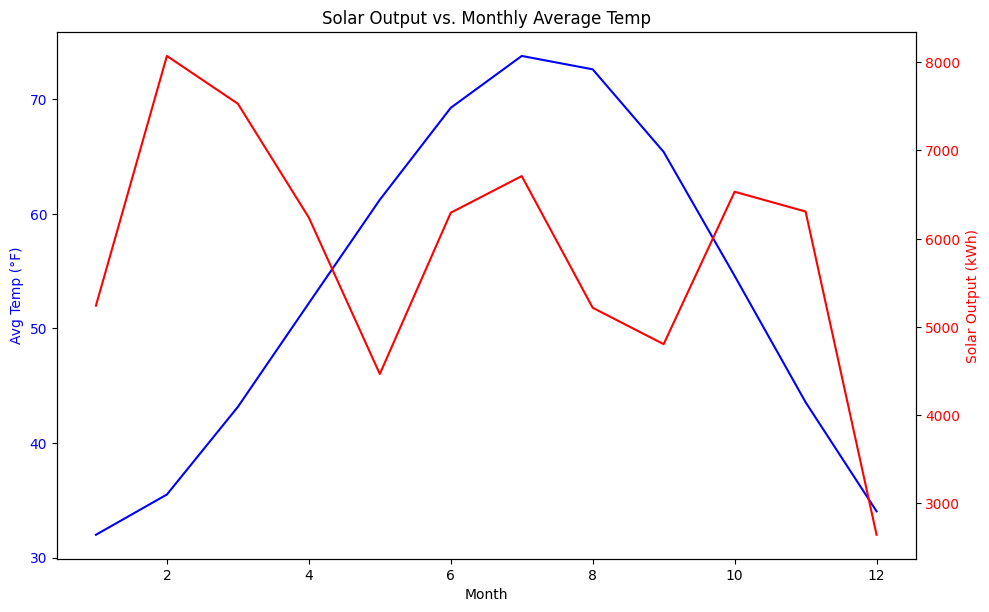

In [56]:
# Plotting the data
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(monthly_avg_temp.index, monthly_avg_temp, 'b-', label='Avg Temp (°C)')
ax1.set_xlabel('Month')
ax1.set_ylabel('Avg Temp (°F)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(monthly_solar_output.index, monthly_solar_output, 'r-', label='Solar Output (kWh)')
ax2.set_ylabel('Solar Output (kWh)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

fig.tight_layout()
plt.title('Solar Output vs. Monthly Average Temp')
plt.show()

**Figure: Solar Output vs. Monthly Average Temperature**

This chart compares average monthly temperatures (°F) from NOAA climate normals (1981–2010) to total solar output capacity (kWh) across the U.S. Each point represents the average conditions for a given month.

The blue line (left y-axis) shows the average temperature across all stations.
The red line (right y-axis) shows the total installed solar output capacity aggregated from USGS solar facility data.
While temperatures peak in mid-summer (July–August), solar output capacity peaks earlier in the year (spring through early summer). This suggests that temperature alone does not directly determine solar energy production. Factors such as solar irradiance, cloud cover, and system efficiency at higher temperatures may also influence actual energy generation.

## Corelation Matrix

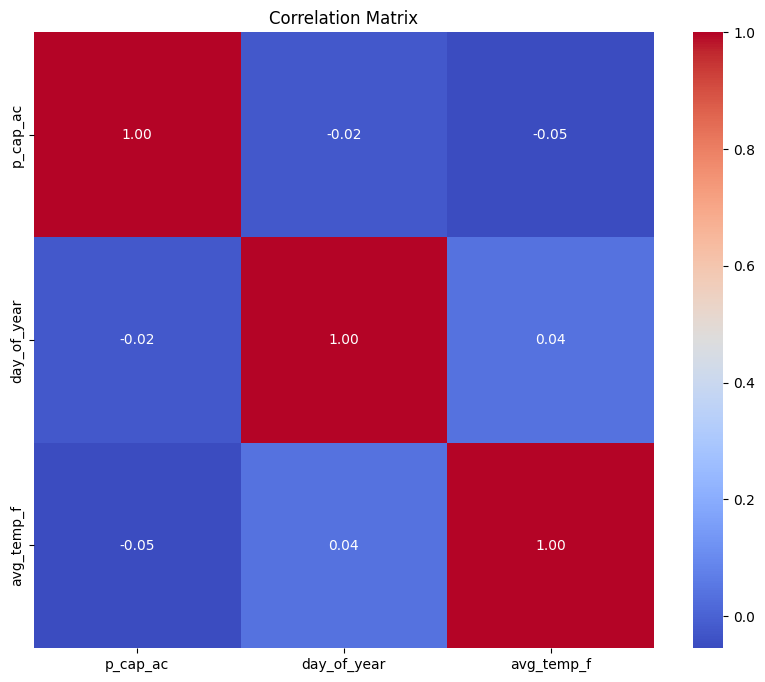

In [59]:
# Combine relevant columns into a single DataFrame
solarDF['day_of_year'] = pd.to_datetime(solarDF['p_img_date'], format='%Y%m%d').dt.dayofyear
combinedDF = solarDF[['p_cap_ac', 'day_of_year']].copy()  # Assuming 'p_area' represents solar output
combinedDF['avg_temp_f'] = pastTempDF['avg_temp_f']

# Compute correlation matrix
correlation_matrix = combinedDF.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**Guide to read Correlation Matrix**

A correlation matrix shows the strength and direction of relationships between numerical variables. Here's how to read it:

Values range from -1 to +1:
 - +1 = perfect positive correlation → as one variable increases, so does the other.
 - 0 = no linear correlation.
 - -1 = perfect negative correlation → as one increases, the other decreases.

The diagonal is always 1, because a variable is perfectly correlated with itself.

The color helps you quickly see strength:
 - Red = high positive
 - Blue = high negative
 - Light shades = weak or no correlation

**Figure: Correlation Matrix of Solar Output Capacity, Day of Year, and Average Temperature**

This heatmap shows the linear correlation between solar facility capacity (p_cap_ac), the day of the year (day_of_year), and average temperature (avg_temp_f).

 - The correlation between solar capacity and average temperature is weakly negative (-0.05), suggesting that higher temperatures do not strongly drive installed solar capacity.
 - The correlation between solar capacity and day of year is also near zero (-0.02), reinforcing that p_cap_ac is a structural/installed value rather than a daily measure.
 - The correlation between day of year and temperature is slightly positive (0.04), but still very weak, likely due to the inclusion of nationwide data which averages out seasonal extremes.

Conclusion: This matrix shows that installed solar capacity does not vary meaningfully with temperature or time of year — which makes sense, since it reflects infrastructure, not daily output. For stronger correlations, actual solar irradiance or production time series would be more suitable.

## Predicted Solar output based on predicted temperatures

In [75]:
# Combine and tag each forecast with its step
forecast_dfs = []
for hour, df in predictionDFs.items():
    df = df.copy()
    df['forecast_hour'] = hour
    forecast_dfs.append(df)

# Combine into one big DataFrame
combined_forecast = pd.concat(forecast_dfs, ignore_index=True)

In [76]:
# Convert forecast Kelvin temps to Fahrenheit
combined_forecast['avg_temp_f'] = (combined_forecast['t2m'] - 273.15) * 9/5 + 32

# Convert time to datetime if not already
combined_forecast['date'] = pd.to_datetime(combined_forecast['time'])


In [77]:
# Average temperature per forecast hour
temp_by_forecast = combined_forecast.groupby('forecast_hour')['avg_temp_f'].mean()


In [78]:
# Normalize temps
min_temp, max_temp = temp_by_forecast.min(), temp_by_forecast.max()
if max_temp != min_temp:
    temp_norm = (temp_by_forecast - min_temp) / (max_temp - min_temp)
else:
    temp_norm = pd.Series(0.5, index=temp_by_forecast.index)

# Simulate solar output as a parabolic function
solar_output_sim = -4 * (temp_norm - 0.5)**2 + 1
solar_output_sim *= 8000  # scale to resemble kWh output


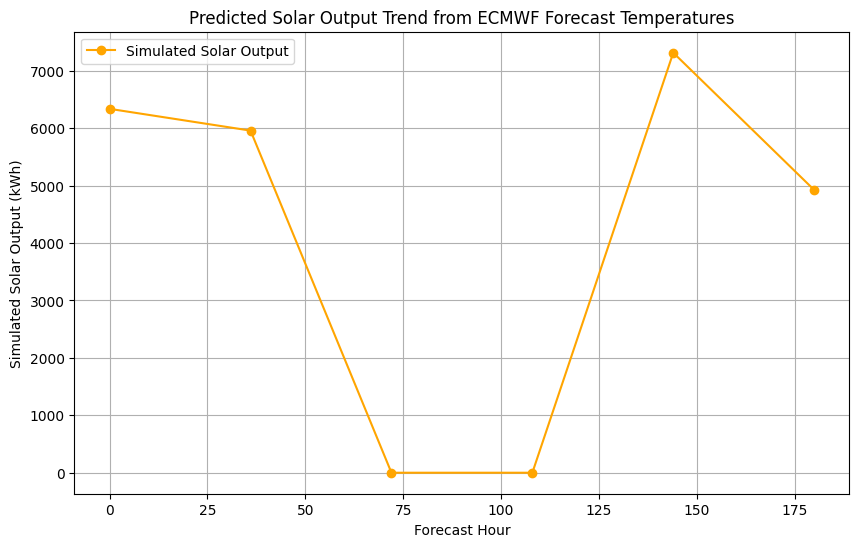

In [79]:
# Plotting predicted solar output
plt.figure(figsize=(10, 6))
plt.plot(temp_by_forecast.index, solar_output_sim, marker='o', color='orange', label='Simulated Solar Output')
plt.xlabel('Forecast Hour')
plt.ylabel('Simulated Solar Output (kWh)')
plt.title('Predicted Solar Output Trend from ECMWF Forecast Temperatures')
plt.grid(True)
plt.legend()
plt.show()


** Figure: Predicted Solar Output Trend from ECMWF Forecast Temperatures **

This line graph visualizes simulated solar energy output based on ECMWF forecast temperature data. Forecasts at several time steps were averaged across all spatial locations and used to model solar output using a parabolic relationship — assuming peak efficiency at moderate temperatures and decreased performance in extreme heat or cold.

 - The simulation uses forecast temperatures from multiple steps (0h to 180h), spaced roughly 1.5 days apart, to approximate short-term trends in solar productivity.
 - Solar output is highest at moderate temperature values and drops toward the extremes, mimicking real-world behavior of solar panel efficiency.
 - This trend reflects how temperature forecasts can inform energy planning, especially when irradiance data is unavailable.

Conclusion: While the model is simplified, this figure demonstrates how even basic temperature forecasts can be used to approximate energy trends, highlighting the value of incorporating weather predictions into solar energy analysis.